In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cancer=load_breast_cancer()
cancer.data


array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

In [3]:
scaler=StandardScaler()
scaler.fit(cancer.data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
X_scaled=scaler.transform(cancer.data)

In [66]:
#keep first four principal components of data
pca=PCA(n_components=20)
#fit PCA model to cancer data
pca.fit(X_scaled)

PCA(copy=True, n_components=20, whiten=False)

In [67]:
#transform data onto first two principal components
X_pca=pca.transform(X_scaled)
print(" Original shape:{}".format(str(X_scaled.shape)))
print(" Reduced shape:{}".format(str(X_pca.shape)))

 Original shape:(569, 30)
 Reduced shape:(569, 20)


In [68]:
print(" PCA component shape:{}".format(str(pca.components_.shape)))

 PCA component shape:(20, 30)


In [69]:
print(" PCA components:{}".format(str(pca.components_)))

 PCA components:[[ -2.18902444e-01  -1.03724578e-01  -2.27537293e-01  -2.20994985e-01
   -1.42589694e-01  -2.39285354e-01  -2.58400481e-01  -2.60853758e-01
   -1.38166959e-01  -6.43633464e-02  -2.05978776e-01  -1.74280281e-02
   -2.11325916e-01  -2.02869635e-01  -1.45314521e-02  -1.70393451e-01
   -1.53589790e-01  -1.83417397e-01  -4.24984216e-02  -1.02568322e-01
   -2.27996634e-01  -1.04469325e-01  -2.36639681e-01  -2.24870533e-01
   -1.27952561e-01  -2.10095880e-01  -2.28767533e-01  -2.50885971e-01
   -1.22904556e-01  -1.31783943e-01]
 [  2.33857132e-01   5.97060883e-02   2.15181361e-01   2.31076711e-01
   -1.86113023e-01  -1.51891610e-01  -6.01653628e-02   3.47675005e-02
   -1.90348770e-01  -3.66575471e-01   1.05552152e-01  -8.99796818e-02
    8.94572342e-02   1.52292628e-01  -2.04430453e-01  -2.32715896e-01
   -1.97207283e-01  -1.30321560e-01  -1.83848000e-01  -2.80092027e-01
    2.19866379e-01   4.54672983e-02   1.99878428e-01   2.19351858e-01
   -1.72304352e-01  -1.43593173e-01  

In [70]:
import pandas as pd
print (pd.DataFrame(pca.components_,columns=cancer.feature_names,index = ['PC-1','PC-2','PC-3','PC-4']))

ValueError: Shape of passed values is (30, 20), indices imply (30, 4)

In [ ]:
#Visualize coefficients using heat map
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],["First component","Second component","Third component","Fourth component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha="left")
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [ ]:
# choosing number of components using explained variance
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

[ 44.27  63.24  72.63  79.23  84.73  88.75  91.    92.59  93.98  95.15
  96.13  97.    97.8   98.32  98.63  98.9   99.1   99.28  99.44  99.54]


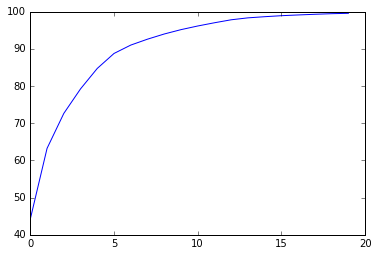

In [71]:
import numpy as np
variance_ratio_cum_sum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(variance_ratio_cum_sum)
plt.plot(variance_ratio_cum_sum)